In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load data dari repository github
dataset = pd.read_excel('https://raw.githubusercontent.com/farhantk/Tugas2_ML/main/Data_Set_1301204108.xlsx')
dataset


,x1,x2,class (1 or 2)
0,43,29,NaN
1,41,15,NaN
2,41,9,NaN
3,45,22,NaN
4,40,47,NaN
5,20,47,NaN
6,30,18,NaN
7,49,2,NaN
8,15,47,NaN
9,46,17,NaN


In [ ]:
X = dataset.iloc[:, [0, 1]].values

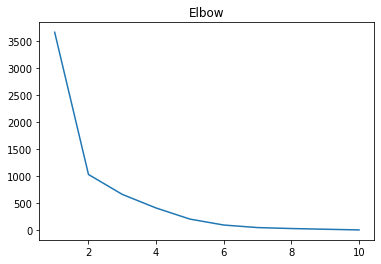

In [ ]:
from sklearn.cluster import KMeans
elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
plt.plot(range(1, 11), elbow)
plt.title('Elbow')
plt.show()

In [25]:
iterations = 4
centroids = None

for i in range(iterations):
    kmeans = KMeans(
        max_iter=1,
        n_init=1,
        init=(centroids if centroids is not None else 'k-means++'),
        n_clusters=2,
        random_state=10)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    print(f'iter: {i} - first: {centroids[0]}, second: {centroids[1]}')

iter: 0 - first: [42.14285714 16.        ], second: [25. 47.]
iter: 1 - first: [42.14285714 16.        ], second: [25. 47.]
iter: 2 - first: [42.14285714 16.        ], second: [25. 47.]
iter: 3 - first: [42.14285714 16.        ], second: [25. 47.]


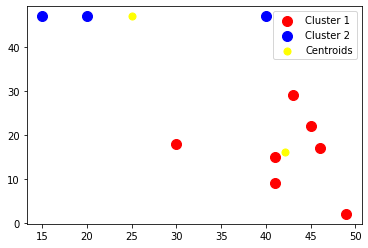

In [26]:
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()